# Solution 3.1 - Money Market Rates

## DRW & UofC Quant Foundations
### Summer 2025
#### Mark Hendricks
#### hendricks@uchicago.edu

***

# Data

Use the data in `data/ref_rates.xlsx` to explore several key money-market rates.
* SOFR
* Fed funds
* 3-month T-bill yield

***

# 1. Exploring Money-Market Rates

### 1.
Plot the time series.

### 2.
Calculate the correlation between the three rates (filtering to the dates for which they all have reported values.)

Do this correlation analysis for the data in
* levels (as provided)
* differences (day-over-day changes)

### 3.

Estimate an autoregression for SOFR:

$$r_{t} = \alpha + \beta\, r_{t-1} + \epsilon_{t}$$

Report the estimated regression beta and r-squared.

Comment on what this regression tells us about the nature of interest rates. 
* That is, can we forecast the next period's rate? 
* Does the series have **autocorrelation**?

### 4.

Estimate an autoregression for returns of the S&P 500 ETF, `SPY`, rather than using SOFR. Get data from 
* `data/spy_data.xlsx`

Are SPY returns autocorrelated? And SPY prices?

***

# <span style="color:red">Solution</span>

In [1]:
import pandas as pd
# import numpy as np
# import datetime
# import warnings

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
sys.path.insert(0, '../cmds')

In [2]:
filepath = '../data/ref_rates.xlsx'
refs = pd.read_excel(filepath, sheet_name='data').set_index('date')

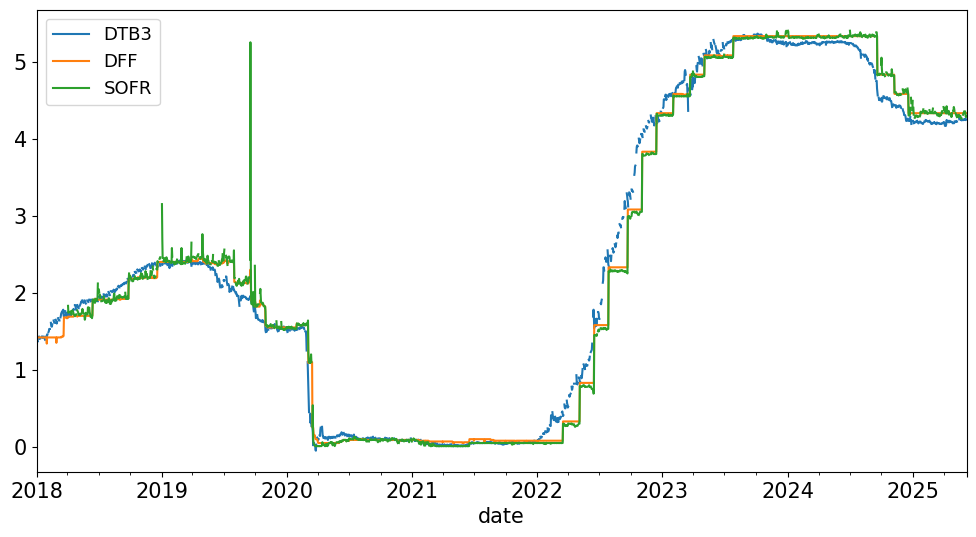

In [3]:
refs.plot();

#### <span style="color:red">Correlation of the **levels**.</span>

In [4]:
refs.corr().style.format('{:.2%}')

,DTB3,DFF,SOFR
DTB3,100.00%,99.47%,99.31%
DFF,99.47%,100.00%,99.91%
SOFR,99.31%,99.91%,100.00%


#### <span style="color:red">Correlation of the day-over-day **changes**.</span>

In [5]:
refs.diff().corr().style.format('{:.2%}')

,DTB3,DFF,SOFR
DTB3,100.00%,0.11%,4.41%
DFF,0.11%,100.00%,47.31%
SOFR,4.41%,47.31%,100.00%


#### <span style="color:red">Autoregression of money-market rates</span>

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



def autoregression(data):

    tab_autoreg = pd.DataFrame(columns=['alpha', 'beta', 'r-squared'],index=data.columns, dtype=float)

    for col in data.columns:
        X = data[[col]].shift(1)
        y = data[col]
        
        X_clean = X.dropna()
        y_clean = y.loc[X_clean.index].dropna()
        X_clean = X_clean.loc[y_clean.index]

        X = X_clean
        y = y_clean

        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        
        tab_autoreg.loc[col,'r-squared'] = r2_score(y, y_pred)
        tab_autoreg.loc[col,'alpha'] =  model.intercept_
        tab_autoreg.loc[col,'beta'] = model.coef_[0]

    return tab_autoreg

In [7]:
tab= autoregression(refs)
tab.style.format({'alpha':'{:.2%}','beta':'{:.2%}','r-squared':'{:.2%}'})

,alpha,beta,r-squared
DTB3,-0.45%,99.98%,99.98%
DFF,0.14%,99.99%,99.95%
SOFR,0.60%,99.81%,99.63%


#### <span style="color:red">Autoregression of spy</span>

The SPY data isn't good. It reports stale prices on non-trading days, which causes returns of zero. We eliminate those 0 return days, but we should eliiminate the non-trading days completely.

In [8]:
filepath_spy = '../data/spy_data.xlsx'
raw = pd.read_excel(filepath_spy, sheet_name='total returns').set_index('date')
spy = raw[['SPY']].copy()

In [9]:
tab = autoregression(spy)
tab.style.format({'alpha':'{:.2%}','beta':'{:.2%}','r-squared':'{:.2%}'})

,alpha,beta,r-squared
SPY,0.05%,-8.21%,0.67%


***